In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read file
df = pd.read_csv('data/train.csv')

**LOAD DATA FROM GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# read file from Google Drive
# Replace 'path/to/your/file.csv' with the actual path to your CSV file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/Data/complaints.csv')
display(df.head())

/tmp/ipython-input-5-1325493268.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


**Analyze the distribution of complaints across different Products.**

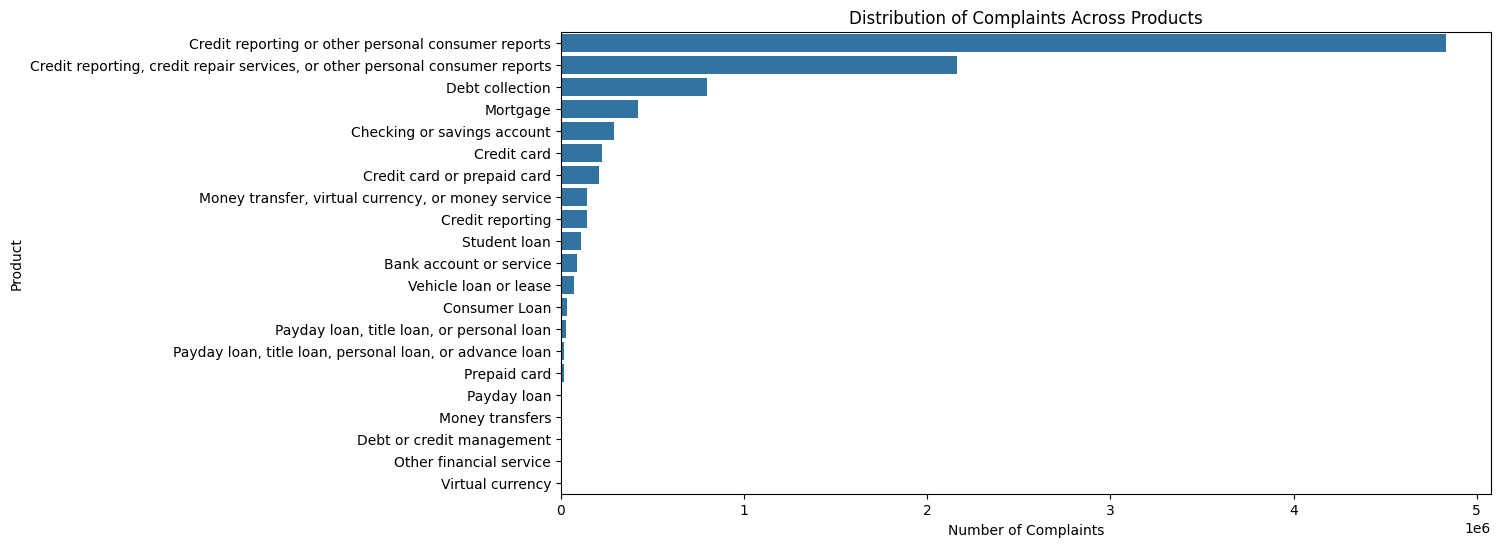

In [8]:

# 1. Analyze the distribution of complaints across different Products.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Product', order=df['Product'].value_counts().index)
plt.title('Distribution of Complaints Across Products')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()


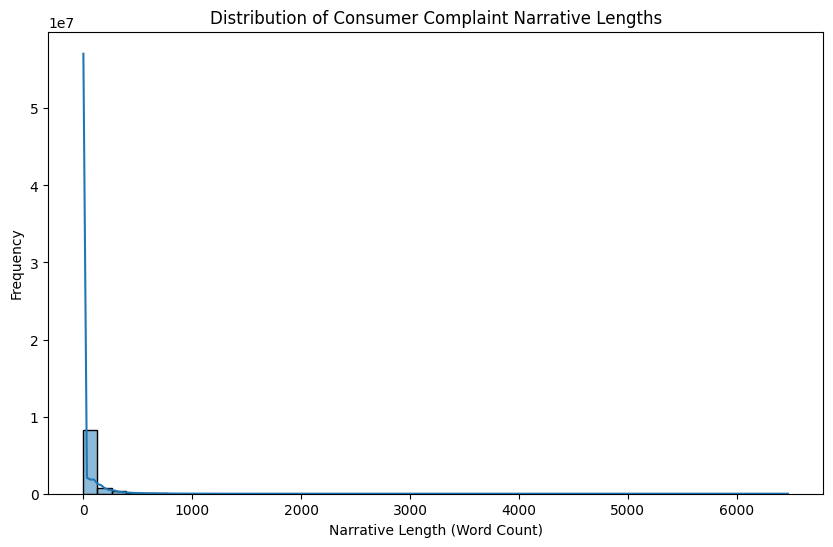

Minimum narrative length: 0 words
Maximum narrative length: 6469 words
Average narrative length: 54.47 words


In [9]:
# 2. Calculate and visualize the length (word count) of the Consumer complaint narrative.
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()) if x != 'nan' else 0)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='narrative_length', bins=50, kde=True)
plt.title('Distribution of Consumer Complaint Narrative Lengths')
plt.xlabel('Narrative Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

print(f"Minimum narrative length: {df['narrative_length'].min()} words")
print(f"Maximum narrative length: {df['narrative_length'].max()} words")
print(f"Average narrative length: {df['narrative_length'].mean():.2f} words")


narrative_length
0       6629041
1           167
2           453
3          1133
4          1422
         ...   
6095          1
6291          1
6312          1
6314          1
6469          1
Name: count, Length: 3869, dtype: int64


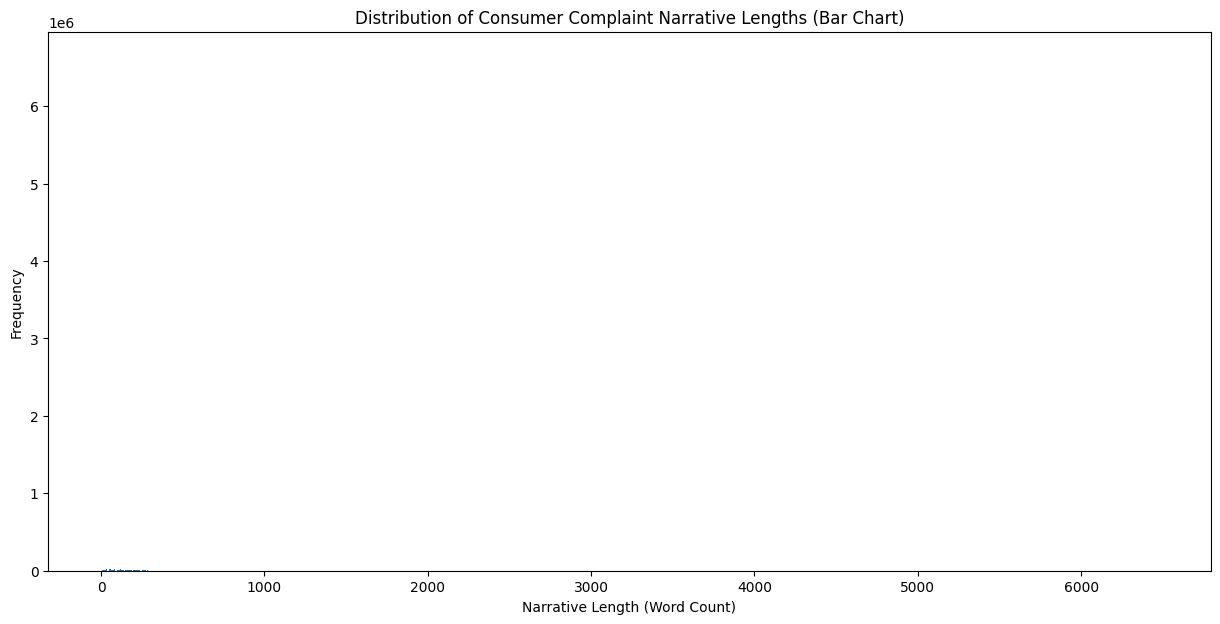

In [12]:

# Group by narrative length and count the occurrences
narrative_length_counts = df['narrative_length'].value_counts().sort_index()

print(narrative_length_counts)
plt.figure(figsize=(15, 7)) # Adjusted figure size for better readability
plt.bar(narrative_length_counts.index, narrative_length_counts.values)
plt.title('Distribution of Consumer Complaint Narrative Lengths (Bar Chart)')
plt.xlabel('Narrative Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

TAKE ONLY COMPLAINTS HAVING LENGTH GREATER THAN 3 AND LES THAN 1000

In [10]:

complaints_less_than_3 = df[df['narrative_length'] < 3]
print(f"Number of complaints with narrative length < 3: {len(complaints_less_than_3)}")

# Filter for complaints with narrative length > 500
complaints_greater_than_500 = df[df['narrative_length'] > 500]
print(f"Number of complaints with narrative length > 500: {len(complaints_greater_than_500)}")

Number of complaints with narrative length < 3: 6629661
Number of complaints with narrative length > 500: 160989


In [13]:

# Filter the DataFrame to keep rows where narrative length is between 3 and 1000 (inclusive)
df_filtered = df[(df['narrative_length'] >= 3) & (df['narrative_length'] <= 1000)]

print(f"Number of rows before filtering: {len(df)}")
print(f"Number of rows after filtering (narrative length between 3 and 1000): {len(df_filtered)}")

# Optionally, update the original DataFrame or work with the filtered one
df = df_filtered

Number of rows before filtering: 9609797
Number of rows after filtering (narrative length between 3 and 1000): 2947708


/tmp/ipython-input-14-3519911769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()) if x != 'nan' else 0)


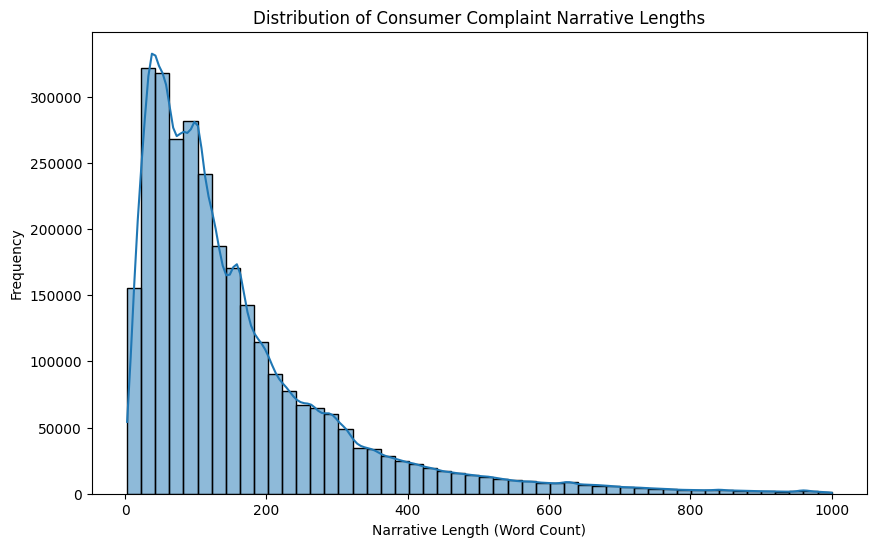

Minimum narrative length: 3 words
Maximum narrative length: 1000 words
Average narrative length: 160.15 words


In [14]:
# 2. Calculate and visualize the length (word count) of the Consumer complaint narrative.
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()) if x != 'nan' else 0)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='narrative_length', bins=50, kde=True)
plt.title('Distribution of Consumer Complaint Narrative Lengths')
plt.xlabel('Narrative Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

print(f"Minimum narrative length: {df['narrative_length'].min()} words")
print(f"Maximum narrative length: {df['narrative_length'].max()} words")
print(f"Average narrative length: {df['narrative_length'].mean():.2f} words")


**Filter the DataFrame to keep rows where narrative length is between 3 and 1000 (inclusive)**

In [15]:

# Filter the DataFrame to keep rows where narrative length is between 3 and 1000 (inclusive)
df_filtered = df[(df['narrative_length'] >= 5) & (df['narrative_length'] <= 500)]

print(f"Number of rows before filtering: {len(df)}")
print(f"Number of rows after filtering (narrative length between 3 and 1000): {len(df_filtered)}")

# Optionally, update the original DataFrame or work with the filtered one
df = df_filtered

Number of rows before filtering: 2947708
Number of rows after filtering (narrative length between 3 and 1000): 2816592


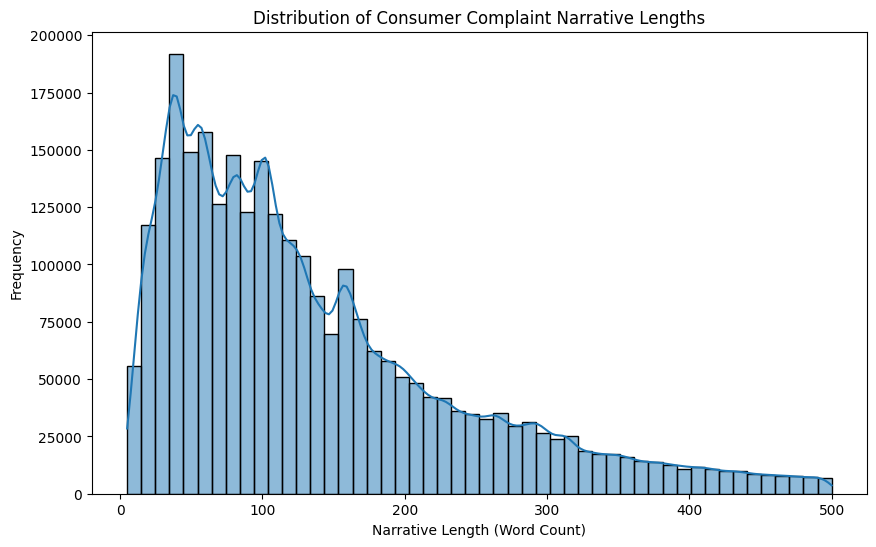

Minimum narrative length: 5 words
Maximum narrative length: 500 words
Average narrative length: 137.43 words


In [16]:
# 2. Calculate and visualize the length (word count) of the Consumer complaint narrative.
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()) if x != 'nan' else 0)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='narrative_length', bins=50, kde=True)
plt.title('Distribution of Consumer Complaint Narrative Lengths')
plt.xlabel('Narrative Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

print(f"Minimum narrative length: {df['narrative_length'].min()} words")
print(f"Maximum narrative length: {df['narrative_length'].max()} words")
print(f"Average narrative length: {df['narrative_length'].mean():.2f} words")


**Include only records for the five specified products: Credit card, Personal loan, Buy Now, Pay Later (BNPL), Savings account, Money transfers**

In [17]:

specified_products = [
    'Credit card',
    'Personal loan',
    'Buy Now, Pay Later (BNPL)',
    'Savings account',
    'Money transfers'
]

df_filtered_products = df[df['Product'].isin(specified_products)].copy()

print(f"Number of rows before product filtering: {len(df)}")
print(f"Number of rows after product filtering: {len(df_filtered_products)}")

df = df_filtered_products
df.head()

Number of rows before product filtering: 2816592
Number of rows after product filtering: 76446


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,454
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,170


**Preprocess text**

In [18]:

import re

def preprocess_text(text):

  if pd.isna(text):
      return ""
  text = text.lower()
  # Remove boilerplate text (example, adjust based on your data)
  text = re.sub(r'i am writing to file a complaint about.*', '', text)
  # Remove special characters and digits
  text = re.sub(r'[^a-z\s]', '', text)
  return text

# Apply preprocessing to the 'Consumer complaint narrative' column
df['processed_narrative'] = df['Consumer complaint narrative'].apply(preprocess_text)

print("Original and processed narratives:")
print(df[['Consumer complaint narrative', 'processed_narrative']].head())

Original and processed narratives:
                            Consumer complaint narrative  \
12237  A XXXX XXXX card was opened under my name by a...   
13280  Dear CFPB, I have a secured credit card with c...   
13506  I have a Citi rewards cards. The credit balanc...   
13955  b'I am writing to dispute the following charge...   
14249  Although the account had been deemed closed, I...   

                                     processed_narrative  
12237  a xxxx xxxx card was opened under my name by a...  
13280  dear cfpb i have a secured credit card with ci...  
13506  i have a citi rewards cards the credit balance...  
13955  bi am writing to dispute the following charges...  
14249  although the account had been deemed closed i ...  


In [19]:

df.to_csv('filtered_complaints.csv', index=False)